In [1]:


import numpy as np # linear algebra
import pandas as pd
import matplotlib as plt# data processing, CSV file I/O (e.g. pd.read_csv)

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))       


/kaggle/input/tomato/tomato_dataset/late_blight/Lb52_lower.jpg
/kaggle/input/tomato/tomato_dataset/late_blight/Lb17.JPG
/kaggle/input/tomato/tomato_dataset/late_blight/Lb39.JPG
/kaggle/input/tomato/tomato_dataset/late_blight/Lb75_lower.jpg
/kaggle/input/tomato/tomato_dataset/late_blight/Lb74_change_270.jpg
/kaggle/input/tomato/tomato_dataset/late_blight/Lb1_change_270.jpg
/kaggle/input/tomato/tomato_dataset/late_blight/Lb56.JPG
/kaggle/input/tomato/tomato_dataset/late_blight/Lb84_change_270.jpg
/kaggle/input/tomato/tomato_dataset/late_blight/Lb77_lower.jpg
/kaggle/input/tomato/tomato_dataset/late_blight/Lb49_hight.jpg
/kaggle/input/tomato/tomato_dataset/late_blight/Lb95_change_90.jpg
/kaggle/input/tomato/tomato_dataset/late_blight/Lb56_lower.jpg
/kaggle/input/tomato/tomato_dataset/late_blight/Lb88_mirror.jpg
/kaggle/input/tomato/tomato_dataset/late_blight/Lb29_lower.jpg
/kaggle/input/tomato/tomato_dataset/late_blight/Lb75_change_90.jpg
/kaggle/input/tomato/tomato_dataset/late_blight/Lb

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [4]:
# Batch Size = number of images that are processed in one forward or backward pass of a neural network during training.
# Channels = 3 (RGB)
# Epochs = Number of times the entire dataset is passed forward and backward through the neural network during the training process.
# Seed =  seed is a starting point or initial value used to generate a sequence of pseudo-random numbers.

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/input/tomato/tomato_dataset",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 3978 files belonging to 6 classes.


In [6]:
## Folder name/Class name
class_names = dataset.class_names
class_names

['bacterial_spot',
 'black_mold',
 'gray_spot',
 'healthy',
 'late_blight',
 'powdery_mildew']

In [7]:
len(dataset)

125

In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape) # that batch has 32 images with 256*256 size and RGB
    print(label_batch.numpy()) # printing all the labels of those 32 images

(32, 256, 256, 3)
[1 1 5 4 5 3 5 0 0 3 5 1 2 0 2 2 1 0 0 3 3 5 1 2 5 1 5 5 4 4 1 0]


In [9]:
for image_batch, label_batch in dataset.take(1):
     print(image_batch[0].numpy())
        
## Color is between 0 t0 255

[[[161.       116.        75.      ]
  [156.84961  111.84961   70.84961 ]
  [150.26562  105.265625  65.69922 ]
  ...
  [ 73.       114.        54.      ]
  [ 73.       114.        54.      ]
  [ 73.       114.        54.      ]]

 [[159.33984  114.33984   73.33984 ]
  [155.87848  110.87848   69.87848 ]
  [149.43555  104.43555   64.86914 ]
  ...
  [ 73.83008  114.83008   54.83008 ]
  [ 73.83008  114.83008   54.83008 ]
  [ 73.83008  114.83008   54.83008 ]]

 [[158.2832   111.13281   72.2832  ]
  [154.96289  107.8125    68.96289 ]
  [149.06262  101.91223   64.496216]
  ...
  [ 74.7168   115.7168    55.716797]
  [ 74.7168   115.7168    55.716797]
  [ 74.7168   115.7168    55.716797]]

 ...

 [[ 68.43359  104.        35.716797]
  [ 70.32883  107.085236  38.20703 ]
  [ 74.814575 110.78699   42.30078 ]
  ...
  [133.5138   164.       104.      ]
  [133.       164.       104.      ]
  [133.       164.       104.      ]]

 [[ 66.83008  103.83008   34.83008 ]
  [ 69.32031  106.32031   37.320312]


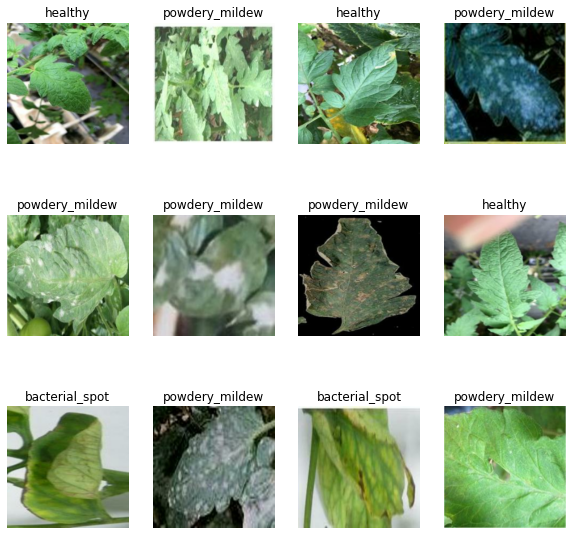

In [10]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [11]:
# plt.figure(figsize=(10, 10)) height and weight
# ax = plt.subplot(3, 4, i + 1)

In [12]:
#80% ===> Training
#20% ===> 10% validation, 10% Test

In [13]:
len(dataset)

125

In [14]:
train_size = 0.8
len(dataset)*train_size

100.0

In [15]:
train_ds = dataset.take(100)
len(train_ds)

100

In [16]:
test_ds = dataset.skip(100)
len(test_ds)

25

In [17]:
val_size=0.1
len(dataset)*val_size

12.5

In [18]:
val_ds = test_ds.take(12)
len(val_ds)

12

In [19]:
test_ds = test_ds.skip(12)
len(test_ds)

13

In [20]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [21]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [22]:
len(train_ds)

100

In [23]:
len(val_ds)

12

In [24]:
len(test_ds)

13

In [25]:
##Cache, Shuffle, and Prefetch the Dataset
## Cache == Read the image from the disk and keep the image in the memory for reuse
## prefetch() method is used to improve the performance of input data pipelines for machine learning models.
## tf.data.AUTOTUNE, which means that TensorFlow will automatically tune the buffer size to 
## dynamically adjust to the available system memory and the input data pipeline.

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [26]:
## Creating a Layer for Resizing and Normalization

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [27]:
## Data Augmentation
## Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [28]:
## Applying Data Augmentation to Train Dataset
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [29]:
## Relu = allowing it to learn complex and non-linear patterns in the data.
##        helps to address the vanishing gradient problem that can occur in deeper neural networks

## Max pooling = MaxPooling2D works by dividing the input feature map into a set of non-overlapping rectangular regions, 
##                and then computing the maximum value within each region.

## Kernal Size = kernel size refers to the dimensions of the sliding window that is passed over the input image 
##               or feature map during the convolution operation.

## Dense = a dense layer is a type of layer where every neuron in the layer is connected to every neuron in the previous layer.

## Softmax = softmax function is often used as an activation function in the output layer for 
##           multi-class classification problems.

## Flatten = convert the output feature map of the last convolutional layer into a one-dimensional feature vector 
##          that can be fed into a fully connected layer for classification or regression.

##The subsequent Conv2D layers apply increasingly complex and abstract filters 
##to the feature maps produced by the previous layer to learn higher-level features
##such as textures, patterns, and object parts.

In [30]:
##This creates a 2D convolutional layer with 32 filters, each with a kernel size of 3x3. 
##The activation function used is ReLU (Rectified Linear Unit). input_shape is the shape of the input data, which in this 
##case is a 2D image.
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 6

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape), ##(3,3) kernal size
    layers.MaxPooling2D((2, 2)), ## pooling window size
    
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (32, 30, 30, 64)         

In [32]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [33]:

history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1, ###??????
    epochs=70,
)


Epoch 1/70
100/100 [==============================] - 63s 362ms/step - loss: 1.6993 - accuracy: 0.2744 - val_loss: 1.5719 - val_accuracy: 0.3568
Epoch 2/70
100/100 [==============================] - 29s 287ms/step - loss: 1.5500 - accuracy: 0.3631 - val_loss: 1.4941 - val_accuracy: 0.3672
Epoch 3/70
100/100 [==============================] - 29s 286ms/step - loss: 1.4112 - accuracy: 0.4305 - val_loss: 1.3241 - val_accuracy: 0.4844
Epoch 4/70
100/100 [==============================] - 29s 288ms/step - loss: 1.3326 - accuracy: 0.4751 - val_loss: 1.3132 - val_accuracy: 0.4844
Epoch 5/70
100/100 [==============================] - 28s 285ms/step - loss: 1.2488 - accuracy: 0.5101 - val_loss: 1.1141 - val_accuracy: 0.5599
Epoch 6/70
100/100 [==============================] - 28s 284ms/step - loss: 1.1930 - accuracy: 0.5409 - val_loss: 1.1456 - val_accuracy: 0.5286
Epoch 7/70
100/100 [==============================] - 29s 285ms/step - loss: 1.1499 - accuracy: 0.5529 - val_loss: 1.0801 - val_ac

In [34]:
scores = model.evaluate(test_ds)

13/13 [==============================] - 8s 23ms/step - loss: 0.2086 - accuracy: 0.9351


In [35]:
##model.save('potato_model.h5')

In [36]:
######### Run from Here
'''
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
model = tf.keras.models.load_model('../input/potatos/potato_model.h5')
'''

"\nimport numpy as np # linear algebra\nimport pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\nimport tensorflow as tf\nmodel = tf.keras.models.load_model('../input/potatos/potato_model.h5')\n"

In [37]:
######### Run from Here
##scores = model.evaluate(test_ds)

In [38]:
scores

[0.20864875614643097, 0.9350961446762085]

In [39]:
history

In [40]:
history.params

{'verbose': 1, 'epochs': 70, 'steps': 100}

In [41]:

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [42]:
type(history.history['loss'])

list

In [43]:
len(history.history['loss'])

70

In [44]:
history.history['accuracy'][:5] # show loss for first 5 epochs

[0.2743864059448242,
 0.3631214499473572,
 0.4304594099521637,
 0.47514158487319946,
 0.5100692510604858]

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [46]:
''''
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
'''

"'\nplt.figure(figsize=(8, 8))\nplt.subplot(1, 2, 1)\nplt.plot(range(EPOCHS), acc, label='Training Accuracy')\nplt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')\nplt.legend(loc='lower right')\nplt.title('Training and Validation Accuracy')\n\nplt.subplot(1, 2, 2)\nplt.plot(range(EPOCHS), loss, label='Training Loss')\nplt.plot(range(EPOCHS), val_loss, label='Validation Loss')\nplt.legend(loc='upper right')\nplt.title('Training and Validation Loss')\nplt.show()\n"

first image to predict
actual label: bacterial_spot
predicted label: bacterial_spot


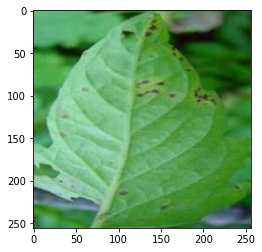

In [47]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [48]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

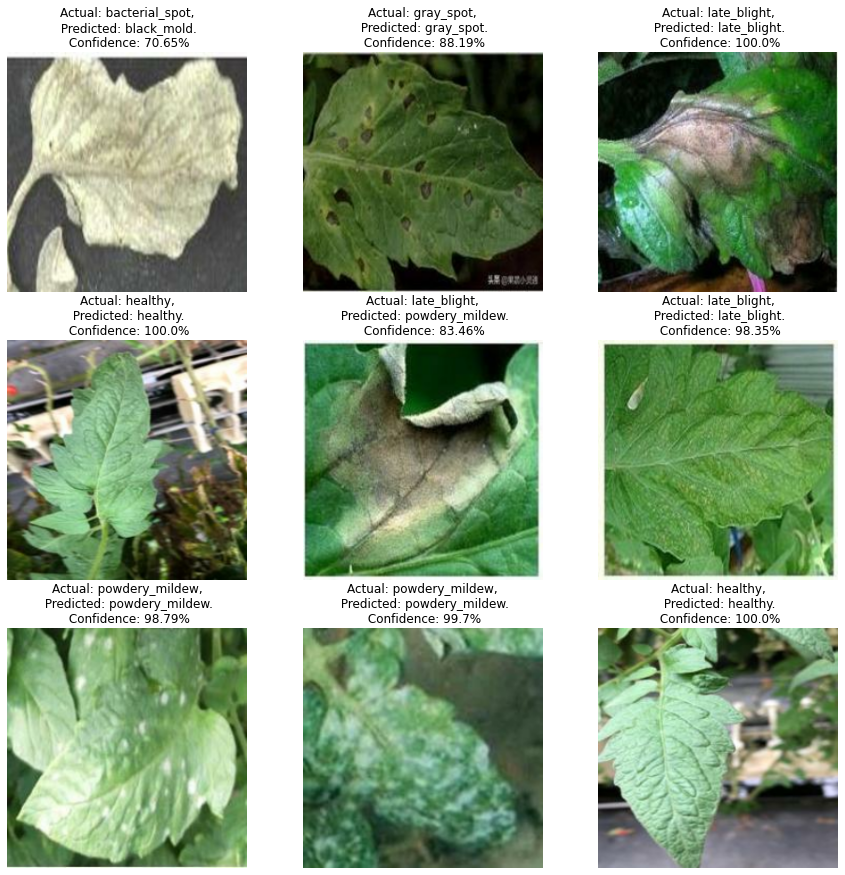

In [49]:

actual_classes = []
predicted_classes = []
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        actual_classes.append(actual_class)
        predicted_classes.append(predicted_class)
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    

In [50]:
print(actual_classes)
print(predicted_classes)

['bacterial_spot', 'gray_spot', 'late_blight', 'healthy', 'late_blight', 'late_blight', 'powdery_mildew', 'powdery_mildew', 'healthy']
['black_mold', 'gray_spot', 'late_blight', 'healthy', 'powdery_mildew', 'late_blight', 'powdery_mildew', 'powdery_mildew', 'healthy']


In [51]:
Y_true = []
Y_pred = []


for j in range(len(test_ds)):
    for images, labels in test_ds.take(j):
        for i in range(len(labels)):

            predicted_class, confidence = predict(model, images[i].numpy())
            actual_class = class_names[labels[i]] 
            Y_true.append(actual_class)
            Y_pred.append(predicted_class)
        

Text(0.5, 144.41374999999996, 'Predicted')

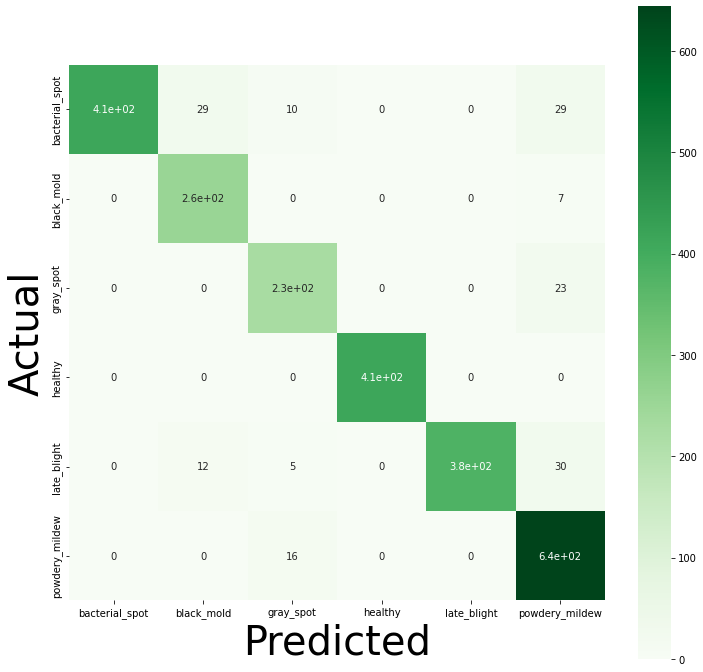

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=class_names, yticklabels=class_names)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

In [53]:
from PIL import Image
from urllib.request import urlopen

# create a file-like object from the url
im_file = urlopen("https://i.ibb.co/BNN39Gd/0e068694-63b7-4edf-a93d-f2e9f28efaa6-RS-LB-3923.jpg")
image_file=Image.open(im_file)


In [54]:
plt.figure(figsize=(15, 15))

ax = plt.subplot(3, 3, i + 1)
plt.imshow(image_file)


predicted_class, confidence = predict(model,np.array(image_file))


plt.title(f"Predicted: {predicted_class}.\n Confidence: {confidence}%")

plt.axis("off")


ValueError: num must be 1 <= num <= 9, not 32

<Figure size 1080x1080 with 0 Axes>